<a href="https://colab.research.google.com/github/WanatchapornS/Data-Preparation-Data-Mining/blob/main/Project_Data_Preparation_and_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## importing packages
import pandas as pd
import numpy as np

In [2]:
# เชื่อม google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [4]:
#นำข้อมูลเข้าผ่าน path
STATION_HOUR = '/content/drive/My Drive/Colab Notebooks/station_hour.csv'
PATH_STATION_HOUR = pd.read_csv(os.path.join(STATION_HOUR), parse_dates = ["Datetime"])

STATION_DAY = '/content/drive/My Drive/Colab Notebooks/station_day.csv'
PATH_STATION_DAY = pd.read_csv(os.path.join(STATION_DAY))

CITY_HOUR = '/content/drive/My Drive/Colab Notebooks/city_hour.csv'
PATH_CITY_HOUR = pd.read_csv(os.path.join(CITY_HOUR))

CITY_DAY = '/content/drive/My Drive/Colab Notebooks/city_day.csv'
PATH_CITY_DAY = pd.read_csv(os.path.join(STATION_HOUR))

STATIONS = '/content/drive/My Drive/Colab Notebooks/stations.csv'
PATH_STATIONS = pd.read_csv(os.path.join(STATIONS))

STATIONS = ["KL007", "KL008"]  #มีทั้งหมด 230 สถานี แต่ในครั้งนี้เราเหลือกมาดู 2 สถานี

<ipython-input-4-9ccf29d3b026>:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  PATH_STATION_HOUR = pd.read_csv(os.path.join(STATION_HOUR), parse_dates = ["Datetime"])
<ipython-input-4-9ccf29d3b026>:12: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  PATH_CITY_DAY = pd.read_csv(os.path.join(STATION_HOUR))


In [ ]:
set(PATH_STATIONS["StationId"])

In [6]:
PATH_STATIONS["StationId"].count()

230

In [7]:
df =PATH_STATION_HOUR
stations = PATH_STATIONS
#ทำการรวมเซลล์โดยใช้ StationId เป็นตัวเชื่อม
df = df.merge(stations, on = "StationId")
#ทำให้ datafream มีเฉพาะ 2 สถานีที่เราเลือก
df = df[df.StationId.isin(STATIONS)]
df.sort_values(["StationId", "Datetime"], inplace = True)
df["Date"] = df.Datetime.dt.date.astype(str)
df.Datetime = df.Datetime.astype(str)

<ipython-input-7-b486f85c05cd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(["StationId", "Datetime"], inplace = True)
<ipython-input-7-b486f85c05cd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = df.Datetime.dt.date.astype(str)
<ipython-input-7-b486f85c05cd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [8]:
df.head(5)

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status,Date
1667812,KL007,2020-02-13 17:00:00,36.94,NaN,4.37,19.85,26.21,4.37,0.12,2.55,...,NaN,NaN,NaN,NaN,NaN,"Kariavattom, Thiruvananthapuram - Kerala PCB",Thiruvananthapuram,Kerala,Active,2020-02-13
1667813,KL007,2020-02-13 18:00:00,34.94,53.34,5.80,20.67,28.47,5.80,0.19,2.69,...,NaN,NaN,NaN,NaN,NaN,"Kariavattom, Thiruvananthapuram - Kerala PCB",Thiruvananthapuram,Kerala,Active,2020-02-13
1667814,KL007,2020-02-13 19:00:00,34.96,52.25,3.79,15.76,21.55,3.79,0.18,2.76,...,NaN,NaN,NaN,NaN,NaN,"Kariavattom, Thiruvananthapuram - Kerala PCB",Thiruvananthapuram,Kerala,Active,2020-02-13
1667815,KL007,2020-02-13 20:00:00,36.20,48.52,3.73,25.43,31.17,3.73,0.44,2.78,...,NaN,NaN,NaN,NaN,NaN,"Kariavattom, Thiruvananthapuram - Kerala PCB",Thiruvananthapuram,Kerala,Active,2020-02-13
1667816,KL007,2020-02-13 21:00:00,40.91,61.06,17.36,46.64,66.00,17.36,1.26,2.65,...,NaN,NaN,NaN,NaN,NaN,"Kariavattom, Thiruvananthapuram - Kerala PCB",Thiruvananthapuram,Kerala,Active,2020-02-13


In [9]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,25164.000000,26871.000000,27754.000000,27670.000000,28531.000000,26206.000000,28517.000000,26353.000000,27603.000000,0.0,0.0,0.0,27265.000000
mean,28.433464,53.018675,3.970852,9.816576,9.158138,5.392237,0.927696,5.923520,35.294570,NaN,NaN,NaN,75.130644
std,21.670670,29.517699,10.523606,8.892043,13.597309,5.140490,0.640026,5.488929,23.261209,NaN,NaN,NaN,30.990605
min,0.250000,1.000000,0.010000,0.030000,0.000000,0.010000,0.000000,0.030000,0.030000,NaN,NaN,NaN,22.000000
25%,13.250000,32.750000,1.270000,3.620000,3.100000,2.480000,0.610000,3.030000,19.170000,NaN,NaN,NaN,54.000000
50%,23.500000,48.500000,2.270000,7.300000,5.580000,4.030000,0.850000,5.020000,30.180000,NaN,NaN,NaN,68.000000
75%,37.750000,67.250000,3.220000,12.960000,10.250000,6.650000,1.120000,7.600000,46.620000,NaN,NaN,NaN,89.000000
max,418.000000,842.710000,230.530000,123.330000,247.400000,102.800000,9.840000,111.800000,197.100000,NaN,NaN,NaN,273.000000


In [10]:
df.shape

(29971, 21)

In [11]:
df.isnull().sum()

StationId          0
Datetime           0
PM2.5           4807
PM10            3100
NO              2217
NO2             2301
NOx             1440
NH3             3765
CO              1454
SO2             3618
O3              2368
Benzene        29971
Toluene        29971
Xylene         29971
AQI             2706
AQI_Bucket      2706
StationName        0
City               0
State              0
Status             0
Date               0
dtype: int64

In [12]:
#ในข้อมูลชุดนี้เราจะในการคำนวณ AQI ตามหลักของ CPCB ในการคำนวนค่า
#ซึ่งข้อมูล AQI ประกอบไปด้วย 7 รายการ ได้แก่ PM2.5, PM10, SO2, NOx, NH3, CO และ O3
#สำหรับ PM2.5, PM10, SO2, NOx และ NH3 จะใช้ค่าเฉลี่ยใน 24 ชั่วโมงที่ผ่านมาโดยมีเงื่อนไขว่ามีค่าอย่างน้อย 16 ค่า
#สำหรับ CO และ O3 จะใช้ค่าสูงสุดในช่วง 8 ชั่วโมงที่ผ่านมา

## หมายเหตุ บางครั้งไม่สามารถวัดได้เนื่องจากขาดการวัดหรือขาดจุดข้อมูลที่จำเป็น
##(ต่อ) AQI สุดท้ายคือดัชนีย่อยสูงสุดโดยมีเงื่อนไขว่าควรมี PM2.5 และ PM10 อย่างน้อยหนึ่งรายการ
##(ต่อ)และอย่างน้อยสามในเจ็ดรายการควรมี

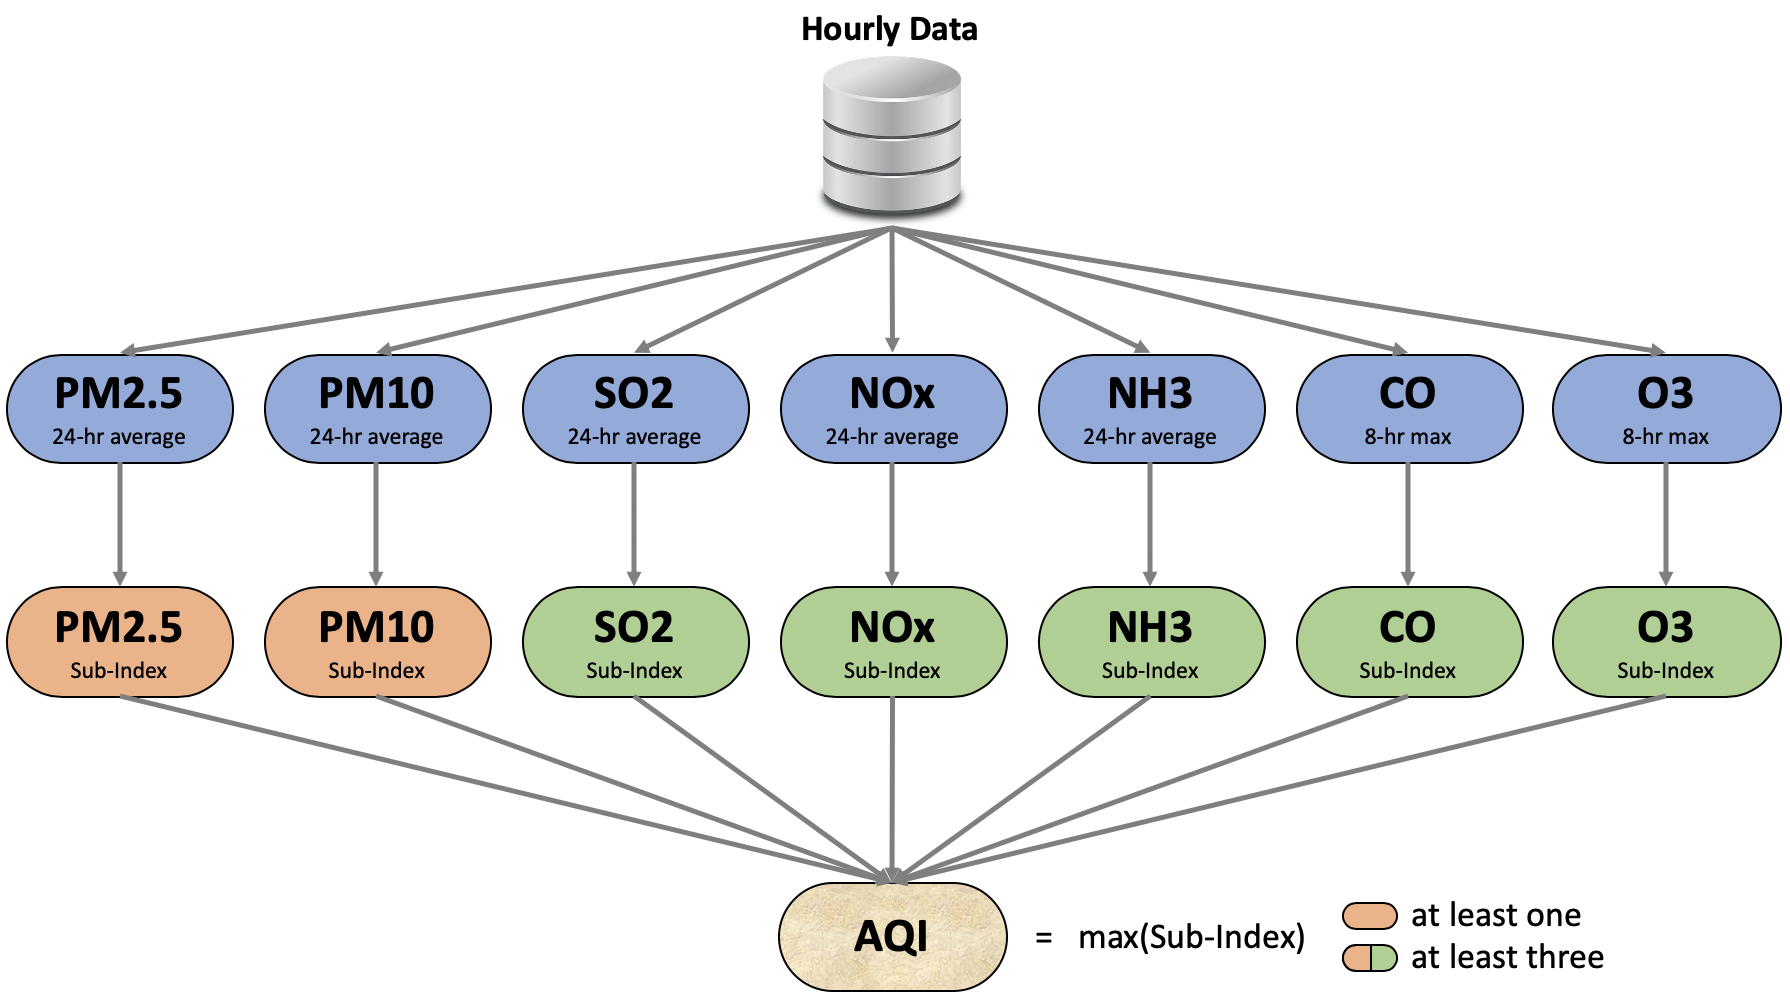


In [13]:

df["PM10_24hr_avg"] = df.groupby("StationId")["PM10"].rolling(window = 24, min_periods = 16).mean().values
df["PM2.5_24hr_avg"] = df.groupby("StationId")["PM2.5"].rolling(window = 24, min_periods = 16).mean().values
df["SO2_24hr_avg"] = df.groupby("StationId")["SO2"].rolling(window = 24, min_periods = 16).mean().values
df["NOx_24hr_avg"] = df.groupby("StationId")["NOx"].rolling(window = 24, min_periods = 16).mean().values
df["NH3_24hr_avg"] = df.groupby("StationId")["NH3"].rolling(window = 24, min_periods = 16).mean().values
df["CO_8hr_max"] = df.groupby("StationId")["CO"].rolling(window = 8, min_periods = 1).max().values
df["O3_8hr_max"] = df.groupby("StationId")["O3"].rolling(window = 8, min_periods = 1).max().values



In [14]:
#เราจะแปลงค่าแต่ละรายการเป็นค่าดัชนีย่อยตามกลุ่ม

In [15]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))

In [16]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))

In [17]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))

In [18]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))

In [19]:
## NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))

In [20]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))

In [21]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))

In [22]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

df["Checks"] = (df["PM2.5_SubIndex"] > 0).astype(int) + \
                (df["PM10_SubIndex"] > 0).astype(int) + \
                (df["SO2_SubIndex"] > 0).astype(int) + \
                (df["NOx_SubIndex"] > 0).astype(int) + \
                (df["NH3_SubIndex"] > 0).astype(int) + \
                (df["CO_SubIndex"] > 0).astype(int) + \
                (df["O3_SubIndex"] > 0).astype(int)

df["AQI_calculated"] = round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
df.loc[df["PM2.5_SubIndex"] + df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
df.loc[df.Checks < 3, "AQI_calculated"] = np.NaN

df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))


In [23]:
df[df.AQI_calculated.isna()].head(5)

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
1667812,KL007,2020-02-13 17:00:00,36.94,NaN,4.37,19.85,26.21,4.37,0.12,2.55,...,0.0,0.0,0.0,0.0,0.0,6.0,100.352941,2,NaN,NaN
1667813,KL007,2020-02-13 18:00:00,34.94,53.34,5.80,20.67,28.47,5.80,0.19,2.69,...,0.0,0.0,0.0,0.0,0.0,9.5,100.352941,2,NaN,NaN
1667814,KL007,2020-02-13 19:00:00,34.96,52.25,3.79,15.76,21.55,3.79,0.18,2.76,...,0.0,0.0,0.0,0.0,0.0,9.5,100.352941,2,NaN,NaN
1667815,KL007,2020-02-13 20:00:00,36.20,48.52,3.73,25.43,31.17,3.73,0.44,2.78,...,0.0,0.0,0.0,0.0,0.0,22.0,100.352941,2,NaN,NaN
1667816,KL007,2020-02-13 21:00:00,40.91,61.06,17.36,46.64,66.00,17.36,1.26,2.65,...,0.0,0.0,0.0,0.0,0.0,63.0,100.352941,2,NaN,NaN


In [24]:
#ระบุค่าที่ไม่ใช่ NaN
AQI_com = df[~df.AQI_calculated.isna()]
AQI_com

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
1667827,KL007,2020-02-14 08:00:00,35.81,51.71,22.90,27.43,52.33,22.90,0.71,1.14,...,66.084375,0.000000,2.350000,43.417187,2.071094,35.5,31.95,6,66.0,Satisfactory
1667828,KL007,2020-02-14 09:00:00,38.47,58.54,48.09,51.82,101.90,48.09,1.46,1.65,...,65.968627,60.143125,2.333088,48.355882,2.656471,73.0,31.95,7,73.0,Satisfactory
1667829,KL007,2020-02-14 10:00:00,47.94,76.12,12.11,34.90,49.01,12.11,0.81,1.77,...,66.742593,61.082941,2.326389,49.072917,2.677083,73.0,55.36,7,73.0,Satisfactory
1667830,KL007,2020-02-14 11:00:00,53.81,79.47,5.82,27.12,34.94,5.82,0.48,1.97,...,67.950000,62.104444,2.333553,48.788816,2.612763,73.0,81.29,7,81.0,Satisfactory
1667831,KL007,2020-02-14 12:00:00,46.91,61.87,5.85,30.14,38.00,5.85,0.42,2.11,...,68.461667,62.092105,2.348750,48.724375,2.555250,73.0,87.83,7,88.0,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697778,KL008,2020-06-30 20:00:00,26.50,49.00,5.78,11.80,11.03,5.00,0.72,8.90,...,34.128788,39.375000,10.813021,14.748438,1.437917,40.0,30.58,7,40.0,Good
1697779,KL008,2020-06-30 21:00:00,21.50,37.75,2.67,3.77,4.17,5.45,0.45,8.32,...,34.223485,39.802083,10.867188,14.800521,1.439687,40.0,30.58,7,40.0,Good
1697780,KL008,2020-06-30 22:00:00,20.00,31.75,2.35,4.40,4.28,5.35,0.47,6.22,...,34.412879,40.020833,10.820312,14.833333,1.441563,40.0,29.65,7,40.0,Good
1697781,KL008,2020-06-30 23:00:00,2.00,34.50,2.70,2.30,3.42,5.55,0.47,5.92,...,33.352273,40.343750,10.723438,14.861458,1.443125,40.0,27.52,7,40.0,Good


In [25]:
df.shape

(29971, 38)

In [26]:
C1 = df[~df.AQI_calculated.isna()].AQI_bucket_calculated.value_counts()
C1

Satisfactory    17568
Good             5089
Moderate         4487
Poor              121
Name: AQI_bucket_calculated, dtype: int64

<Axes: >

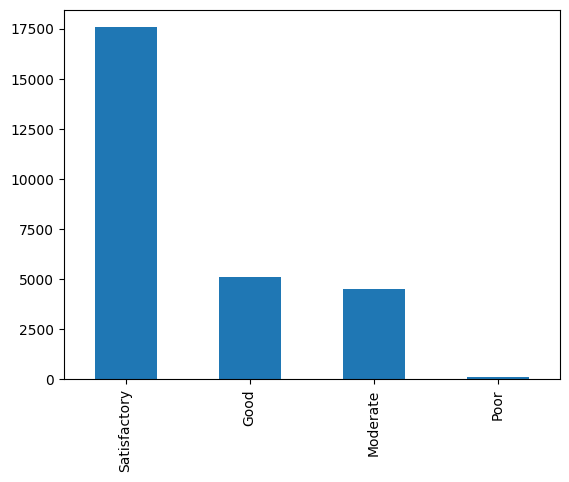

In [27]:
#สรุปข้อมูล
C1.plot.bar()

In [28]:
#เอาตรงนี้ไปลงด้วย
C2 = AQI_com.groupby(["StationId", "AQI_bucket_calculated"]).size().reset_index(name="Counts")
C2

,StationId,AQI_bucket_calculated,Counts
0,KL007,Good,718
1,KL007,Moderate,241
2,KL007,Satisfactory,1904
3,KL008,Good,4371
4,KL008,Moderate,4246
5,KL008,Poor,121
6,KL008,Satisfactory,15664


<Axes: >

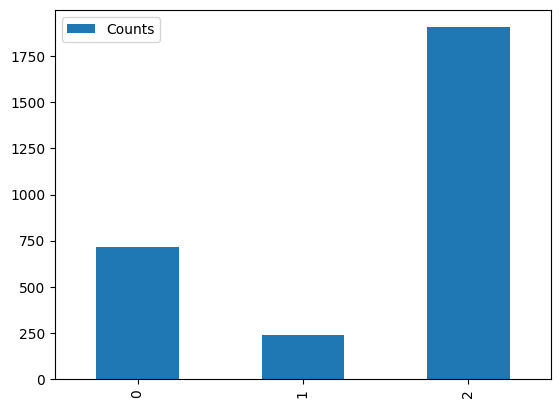

In [29]:
C2[C2["StationId"] == "KL007"].plot(kind='bar')

<Axes: >

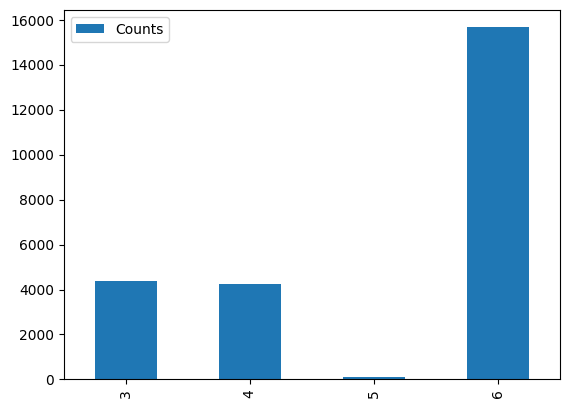

In [30]:
C2[C2["StationId"] == "KL008"].plot(kind='bar')

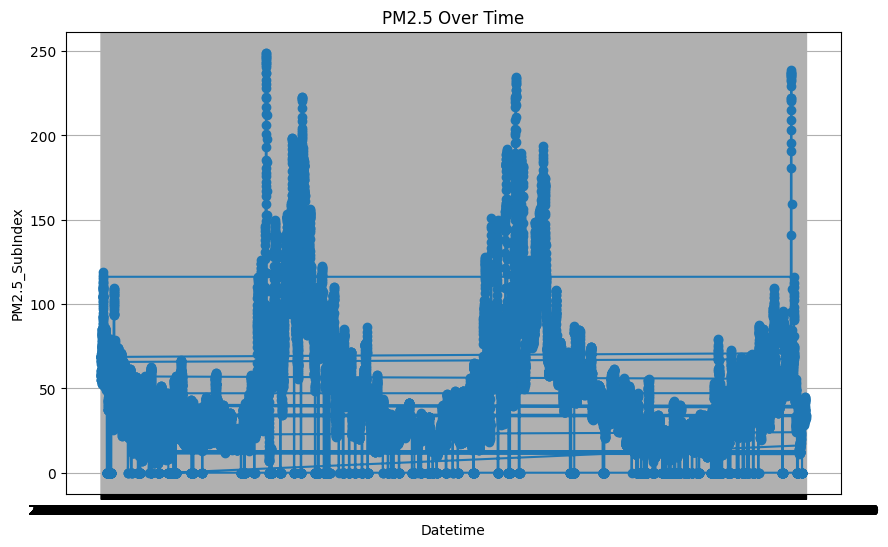

In [48]:
T_PM25 = AQI_com[['Datetime','PM2.5_SubIndex']]
plt.figure(figsize=(10, 6))
plt.plot(T_PM25['Datetime'], T_PM25['PM2.5_SubIndex'], marker='o', linestyle='-')
plt.title('PM2.5 Over Time')
plt.xlabel('Datetime')
plt.ylabel('PM2.5_SubIndex')
plt.grid(True)
plt.show()

<ipython-input-89-5a09425cd9e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AQI_com['Datetime'] = pd.to_datetime(AQI_com['Datetime'])


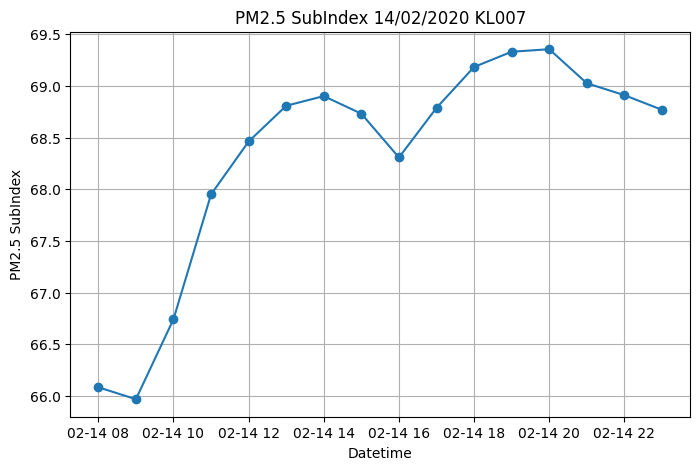

In [89]:
AQI_com['Datetime'] = pd.to_datetime(AQI_com['Datetime'])
selected_rows = AQI_com[AQI_com['Datetime'].dt.date == pd.to_datetime('2020-02-14').date()]
selected_007_14 =selected_rows[selected_rows['StationId'] == 'KL007']
plt.figure(figsize=(8, 5))
plt.plot(selected_007_14['Datetime'], selected_007_14['PM2.5_SubIndex'], marker='o', linestyle='-')
plt.title('PM2.5 SubIndex 14/02/2020 KL007')
plt.xlabel('Datetime')
plt.ylabel('PM2.5 SubIndex')
plt.grid(True)
plt.show()

<ipython-input-92-2611f163823d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AQI_com['Datetime'] = pd.to_datetime(AQI_com['Datetime'])


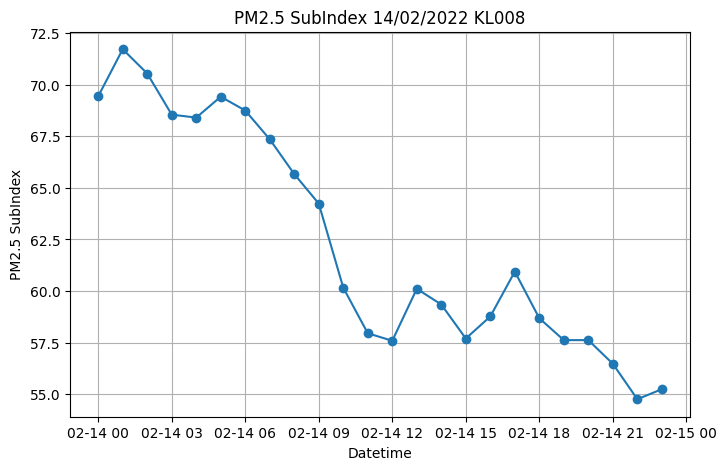

In [92]:
AQI_com['Datetime'] = pd.to_datetime(AQI_com['Datetime'])
selected_rows = AQI_com[AQI_com['Datetime'].dt.date == pd.to_datetime('2020-02-14').date()]
selected_008_14 =selected_rows[selected_rows['StationId'] == 'KL008']
plt.figure(figsize=(8, 5))
plt.plot(selected_008_14['Datetime'], selected_008_14['PM2.5_SubIndex'], marker='o', linestyle='-')
plt.title('PM2.5 SubIndex 14/02/2022 KL008')
plt.xlabel('Datetime')
plt.ylabel('PM2.5 SubIndex')
plt.grid(True)
plt.show()

<ipython-input-64-56375e51f2df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AQI_com['Datetime'] = pd.to_datetime(AQI_com['Datetime'])


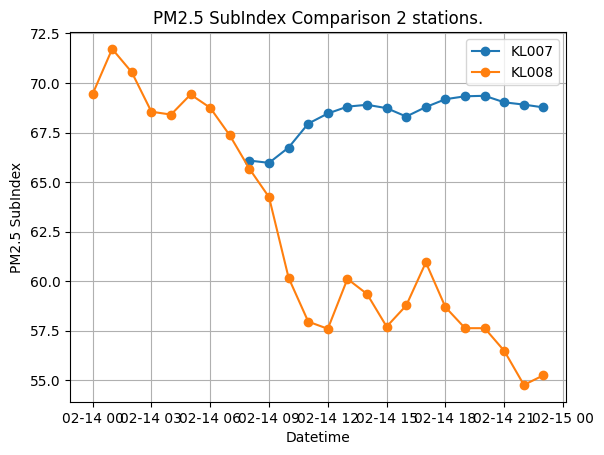

In [64]:
AQI_com['Datetime'] = pd.to_datetime(AQI_com['Datetime'])
selected_rows = AQI_com[AQI_com['Datetime'].dt.date == pd.to_datetime('2020-02-14').date()]
selected_007_14 =selected_rows[selected_rows['StationId'] == 'KL007']
selected_008_14 =selected_rows[selected_rows['StationId'] == 'KL008']
plt.plot(selected_007_14['Datetime'], selected_007_14['PM2.5_SubIndex'], marker='o', linestyle='-', label='KL007')
plt.plot(selected_008_14['Datetime'], selected_008_14['PM2.5_SubIndex'], marker='o', linestyle='-', label='KL008')
plt.title('PM2.5 SubIndex Comparison 2 stations.')
plt.xlabel('Datetime')
plt.ylabel('PM2.5 SubIndex')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-45-ae9ed5496a8b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_PM25['Datetime'] = pd.to_datetime(T_PM25['Datetime'])


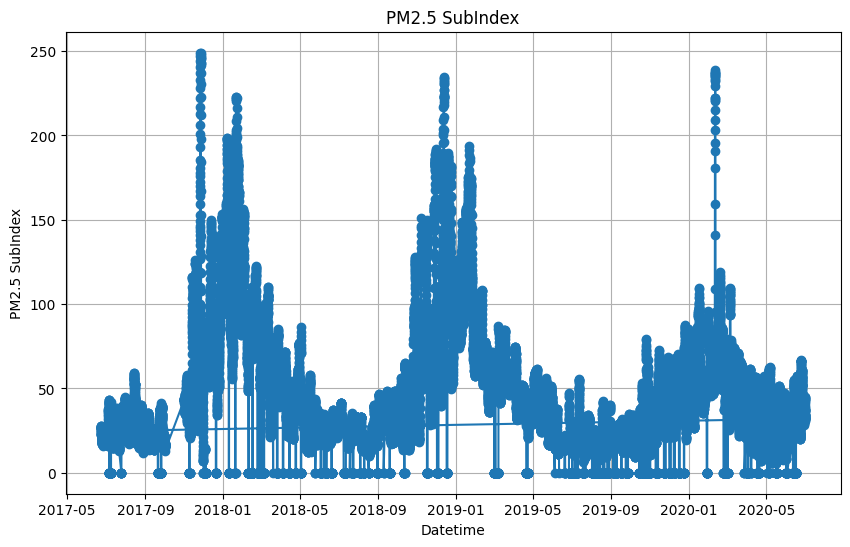

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
T_PM25 = AQI_com[['Datetime','PM2.5_SubIndex']]
T_PM25['Datetime'] = pd.to_datetime(T_PM25['Datetime'])
plt.figure(figsize=(10, 6))
plt.plot(T_PM25['Datetime'], T_PM25['PM2.5_SubIndex'], marker='o', linestyle='-')
plt.title('PM2.5 SubIndex')
plt.xlabel('Datetime')
plt.ylabel('PM2.5 SubIndex')
plt.grid(True)
plt.show()

<ipython-input-77-fd5243157f17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_AQI['Datetime'] = pd.to_datetime(T_AQI['Datetime'])
<ipython-input-77-fd5243157f17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_AQI['Date'] = T_AQI['Datetime'].dt.date


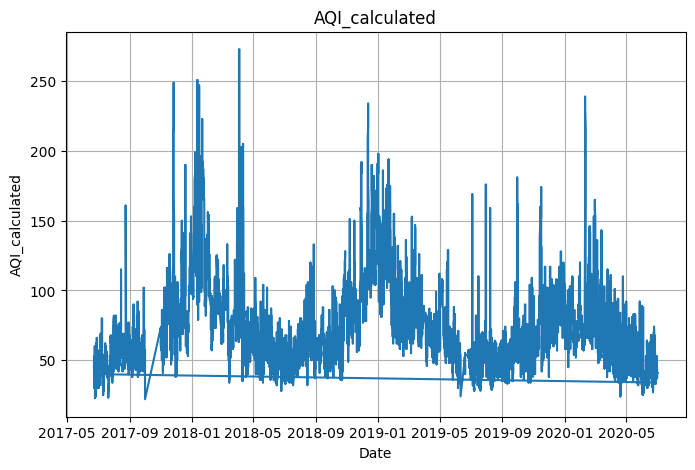

In [77]:
T_AQI['Datetime'] = pd.to_datetime(T_AQI['Datetime'])
T_AQI['Date'] = T_AQI['Datetime'].dt.date
plt.figure(figsize=(8, 5))
plt.plot(T_AQI['Date'], T_AQI['AQI_calculated'], linestyle='-')
plt.title('AQI_calculated')
plt.xlabel('Date')
plt.ylabel('AQI_calculated')
plt.grid(True)
plt.show()

In [79]:
T_AQI['Date'].min()

datetime.date(2017, 6, 23)

In [80]:
T_AQI['Date'].max()

datetime.date(2020, 7, 1)

In [85]:
max_aqi_date = T_AQI[T_AQI['AQI_calculated'] == T_AQI['AQI_calculated'].max()]['Date'].iloc[0]
max_aqi_value = df['AQI_calculated'].max()
print("วันที่มี AQI สูงที่สุดคือ:", max_aqi_date)
print("ค่า AQI สูงที่สุดคือ:", max_aqi_value)

วันที่มี AQI สูงที่สุดคือ: 2018-04-03
ค่า AQI สูงที่สุดคือ: 273.0


In [31]:
## ด้านล่างนี้ไม่รู้จะเอาไปลงยังไงลองๆเอาไปลงดูด้วย

In [32]:
##Day level
df_station_hour = df
df_station_day = PATH_STATION_DAY

df_station_day = df_station_day.merge(df.groupby(["StationId", "Date"])["AQI_calculated"].mean().reset_index(), on = ["StationId", "Date"])
df_station_day.AQI_calculated = round(df_station_day.AQI_calculated)

In [33]:
##City level
df_city_hour = PATH_CITY_HOUR
df_city_day = PATH_CITY_DAY

df_city_hour["Date"] = pd.to_datetime(df_city_hour.Datetime).dt.date.astype(str)

df_city_hour = df_city_hour.merge(df.groupby(["City", "Datetime"])["AQI_calculated"].mean().reset_index(), on = ["City", "Datetime"])
df_city_hour.AQI_calculated = round(df_city_hour.AQI_calculated)

df_city_day = df_city_day.merge(df_city_hour.groupby(["City","Datetime"])["AQI_calculated"].mean().reset_index(), on = ["Datetime"])
df_city_day.AQI_calculated = round(df_city_day.AQI_calculated)


In [34]:
df_check_station_hour = df_station_hour[["AQI", "AQI_calculated"]].dropna()
df_check_station_day = df_station_day[["AQI", "AQI_calculated"]].dropna()
df_check_city_hour = df_city_hour[["AQI", "AQI_calculated"]].dropna()
df_check_city_day = df_city_day[["AQI", "AQI_calculated"]].dropna()

print("Station + Hour")
print("Rows: ", df_check_station_hour.shape[0])
print("Matched AQI: ", (df_check_station_hour.AQI == df_check_station_hour.AQI_calculated).sum())
print("% Match: ", (df_check_station_hour.AQI == df_check_station_hour.AQI_calculated).sum() * 100 / df_check_station_hour.shape[0])
print("\n")
print("Station + Day")
print("Rows: ", df_check_station_day.shape[0])
print("Matched AQI: ", (df_check_station_day.AQI == df_check_station_day.AQI_calculated).sum())
print("% Match: ", (df_check_station_day.AQI == df_check_station_day.AQI_calculated).sum() * 100 / df_check_station_day.shape[0])
print("\n")
print("City + Hour")
print("Rows: ", df_check_city_hour.shape[0])
print("Matched AQI: ", (df_check_city_hour.AQI == df_check_city_hour.AQI_calculated).sum())
print("% Match: ", (df_check_city_hour.AQI == df_check_city_hour.AQI_calculated).sum() * 100 / df_check_city_hour.shape[0])
print("\n")
print("City + Day")
print("Rows: ", df_check_city_day.shape[0])
print("Matched AQI: ", (df_check_city_day.AQI == df_check_city_day.AQI_calculated).sum())
print("% Match: ", (df_check_city_day.AQI == df_check_city_day.AQI_calculated).sum() * 100 / df_check_city_day.shape[0])


Station + Hour
Rows:  27265
Matched AQI:  27265
% Match:  100.0


Station + Day
Rows:  1170
Matched AQI:  1170
% Match:  100.0


City + Hour
Rows:  24734
Matched AQI:  24734
% Match:  100.0


City + Day
Rows:  1679775
Matched AQI:  32222
% Match:  1.9182330966944978
